# Obtain Data

Before I process or change the data, let’s just get an idea of what we are dealing with. \
The very first step of a data science project is straightforward. We obtain the data that we need from available data sources. For this project I have the King County House Sales dataset. The dataset can be found in the file `"kc_house_data.csv"`

### About this Dataset
This dataset contains house sale prices for King County, which includes Seattle. Dataset includes homes sold between May 2014 and May 2015.

***There are a some of libraries that are used in this step. They are imported and aliased below.***

In [28]:
# import all libraries for work 
import os # for work with path/dir
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [26]:
# quartile function. We divide the data into four quantiles and check the dependencies
def quantile(df, column_name):
# find quartile, max and min values
    min_value = df[column_name].min()
    first_quantile = df[column_name].describe()[4]
    second_quantile = df[column_name].describe()[5]
    third_quantile = df[column_name].describe()[6]
    max_value = df[column_name].max()
# Bin edges that will be used to "cut" the data into groups
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
# Labels for the four budget level groups
    bin_names = [ 'First', 'Second', 'Third', 'Fourth'] 
# Creates budget_levels column
    name = '{}_levels'.format(column_name)
    df[name] = pd.cut(df[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return df

In [67]:
# quartile count function. We divide the data into four quantiles and check the dependencies
def quantile_count(df, column_name):
    count = pd.DataFrame(columns=[column_name,'count'])
    count.loc[0]=(str(df[column_name].min())+'-'+str(df[column_name].describe()[4]),df[df[column_name+'_levels']=='First']['price'].count())
    count.loc[1]=(str(str(df[column_name].describe()[4])+'-'+str(df[column_name].describe()[5])),df[df[column_name+'_levels']=='Second']['price'].count())
    count.loc[2]=(str(df[column_name].describe()[5])+'-'+str(df[column_name].describe()[6]),df[df[column_name+'_levels']=='Third']['price'].count())
    count.loc[3]=(str(df[column_name].describe()[6])+'-'+str(df[column_name].max()),df[df[column_name+'_levels']=='Fourth']['price'].count())
    return count

### First view of Data. 
***Read in the dataset from file and start to investigate basic things***

In [3]:
# read information from csv file
pd.set_option('display.max_columns', 22)
data = pd.read_csv("kc_house_data.csv") 
# Lets's look closer to our data
data

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650     1.0         NaN   0.0          3      7        1180   
1          7242     2.0         0.0   0.0          3      7        2170   
2         10000     1.0         0.0   0.0          3      6         770   
3          5000     1.0         0.0   0.0          5      7        1050   
4          8080     1.0         0.0   0.0          3      8        1680   
...         ...     ...         ...   ...        ...    ...         ...   
21592      1131     3.0         0.0   0.0          3      8        1530   
21593      5813     2.0         0.0   0.0          3      8        2310   
21594      1350     2.0         0.0   0.0          3      7        1020   
21595      2388     2.0         NaN   0.0          3      8        1600   
21596      1076     2.0         0.0   0.0          3      7        1020   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0               0.0      1955           0.0    98178  47.5112 -122.257   
1             400.0      1951        1991.0    98125  47.7210 -122.319   
2               0.0      1933           NaN    98028  47.7379 -122.233   
3             910.0      1965           0.0    98136  47.5208 -122.393   
4               0.0      1987           0.0    98074  47.6168 -122.045   
...             ...       ...           ...      ...      ...      ...   
21592           0.0      2009           0.0    98103  47.6993 -122.346   
21593           0.0      2014           0.0    98146  47.5107 -122.362   
21594           0.0      2009           0.0    98144  47.5944 -122.299   
21595           0.0      2004           0.0    98027  47.5345 -122.069   
21596           0.0      2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [207]:
#spesial data frame for all interesting facts
remarks = pd.DataFrame(columns=['column_name','problem','solution'])

In [3]:
#Check shape: rows and columns
data.shape

(21597, 21)

In [9]:
# create a map of area, where houses from data set located
fig = px.scatter_mapbox(data, lat="lat", lon="long", color="price", hover_name="price", hover_data=["bedrooms", "bathrooms"],
                        color_discrete_sequence=["green"], size_max=15, zoom=8, width=900, height=600, 
                        title =  '<b>Map of area, check location</b>')
fig.update_layout(mapbox_style="open-street-map")
fig.show(config={'scrollZoom': False})

### Let's check statistical infromation with we should work.

In [4]:
#view some basic statistical information 
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [10]:
# checkin information about columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
# checking if any value is NaN 
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The short description of the data set shows us that it contains various data types and null values. It’s important to remember this as we process the data and build our model.

### We need to study data and its relationships, let's look at what the data in the columns means.

In [7]:
# iterating the columns 
for col in data.columns: 
    print(col)

id
date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15



What all columns mean?

### Column Names and descriptions for Kings County Data Set
1. **id** - unique identified for a house
2. **Date** - date house was sold
3. **Price** -  price is prediction target
4. **bedrooms** -  Number of Bedrooms/House
5. **bathrooms** -  Number of bathrooms/bedrooms
6. **sqft_living** - square footage of the home
7. **sqft_lot** - square footage of the lot
8. **floors** - Total floors (levels) in house
9. **waterfront** - House which has a view to a waterfront
10. **view** - Has been viewed
11. **condition** - How good the condition is ( Overall )
12. **grade** - overall grade given to the housing unit, based on King County grading system
13. **sqft_above** - square footage of house apart from basement
14. **sqft_basement** - square footage of the basement
15. **yr_built** - Built Year
16. **yr_renovated** - Year when house was renovated
17. **zipcode** - zip
18. **lat** - Latitude coordinate
19. **long** - Longitude coordinate
20. **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
21. **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

****
###  About column *id*:

In [11]:
data['id'].count()

21597

In [12]:
# how many duplicates 
data.duplicated(subset='id').sum()

177

In [208]:
remarks.loc[0] = ('id', 'duplicates', 'check one more times, whta is that mean')

In our data set we have **21597** rows, some of the `id` meet more then once (**177** have duplicates).
****
### About column *date*:
When we check information about columns, we found that ot has object type.

In [83]:
data['date'].value_counts()

6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
             ... 
3/8/2015        1
5/24/2015       1
8/30/2014       1
7/27/2014       1
11/30/2014      1
Name: date, Length: 372, dtype: int64

When I see this information, I can't say anything. Then I change the dataframe a little for better look.

In [95]:
data['date'] = pd.to_datetime(data['date'])
data['year'],data['month'],data['day'] = data['date'].dt.year, data['date'].dt.month, data['date'].dt.dayofweek
data['year'].value_counts()

2014    14622
2015     6975
Name: year, dtype: int64

How we know from the begining - we have information about two years.

In [96]:
data['month'].value_counts()

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: month, dtype: int64

Look like all month have atable sales. What about day of the week?

In [97]:
data['day'].value_counts()

1    4710
2    4600
0    4097
3    3989
4    3684
5     287
6     230
Name: day, dtype: int64

In [209]:
remarks.loc[1] = ('date', 'type of column is object', 'change data type to datatime for convenience of work')

Very intresting situation: **Saturday and Sunday bad day for deal.**
****
### About column *price* on math language:

In [23]:
# check deneral statistic information
print('Price Min:', data['price'].min())
print('Price Mean:', data['price'].mean())
print('Price Median:', data['price'].median())
print('Price Max:', data['price'].max())

Price Min: 78000.0
Price Mean: 540296.5735055795
Price Median: 450000.0
Price Max: 7700000.0


How we can see it is a HUGE gap between min and max price.

In [24]:
data['price'].std()

367368.1401013936

## Do we have houses expensive than million?

In [68]:
data.loc[data['price']>1000000].sort_values("price")

id        date      price  bedrooms  bathrooms  sqft_living  \
21590  7936000429   3/26/2015  1010000.0         4       3.50         3510   
3546   1525059112  10/18/2014  1010000.0         3       2.50         2240   
9400   1257202430   6/17/2014  1010000.0         4       3.50         2650   
10653  7852160310   8/14/2014  1010000.0         4       2.75         3430   
10934  2025059204   7/30/2014  1010000.0         4       2.50         2480   
...           ...         ...        ...       ...        ...          ...   
1446   8907500070   4/13/2015  5350000.0         5       5.00         8000   
4407   2470100110    8/4/2014  5570000.0         5       5.75         9200   
9245   9208900037   9/19/2014  6890000.0         6       7.75         9890   
3910   9808700762   6/11/2014  7060000.0         5       4.50        10040   
7245   6762700020  10/13/2014  7700000.0         6       8.00        12050   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
21590      7200     2.0         0.0   0.0          3      9        2600   
3546      41339     1.0         0.0   0.0          4      9        2240   
9400       3060     2.0         0.0   0.0          3      9        2060   
10653     15877     1.0         0.0   4.0          3     11        3430   
10934     12688     1.0         0.0   0.0          4      9        1820   
...         ...     ...         ...   ...        ...    ...         ...   
1446      23985     2.0         0.0   4.0          3     12        6720   
4407      35069     2.0         0.0   0.0          3     13        6200   
9245      31374     2.0         0.0   4.0          3     13        8860   
3910      37325     2.0         1.0   2.0          3     11        7680   
7245      27600     2.5         0.0   3.0          4     13        8570   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
21590         910.0      2009           0.0    98136  47.5537 -122.398   
3546            0.0      1945        1992.0    98005  47.6483 -122.163   
9400          590.0      2001           0.0    98103  47.6735 -122.332   
10653           0.0      2005           0.0    98065  47.5364 -121.856   
10934         660.0      1967           0.0    98004  47.6344 -122.205   
...             ...       ...           ...      ...      ...      ...   
1446         1280.0      2009           0.0    98004  47.6232 -122.220   
4407         3000.0      2001           NaN    98039  47.6289 -122.233   
9245         1030.0      2001           0.0    98039  47.6305 -122.240   
3910         2360.0      1940        2001.0    98004  47.6500 -122.214   
7245         3480.0      1910        1987.0    98102  47.6298 -122.323   

       sqft_living15  sqft_lot15 price_levels  
21590           2050        6200       Fourth  
3546            2900       45738       Fourth  
9400            1470        3060       Fourth  
10653           4080       14577       Fourth  
10934           2910       11979       Fourth  
...              ...         ...          ...  
1446            4600       21750       Fourth  
4407            3560       24345       Fourth  
9245            4540       42730       Fourth  
3910            3930       25449       Fourth  
7245            3940        8800       Fourth  

[1458 rows x 22 columns]

In [72]:
# How many houses has cost more than 1 million
((len(data[data['price']>1000000]))/len(data))*100

6.750937630226421

In [73]:
# How many houses has cost more than 1,5 million
((len(data[data['price']>1500000]))/len(data))*100

2.3892207251007087

In [74]:
# How many houses has cost more than 2 million
((len(data[data['price']>2000000]))/len(data))*100

0.9167939991665508

**In King County less than 1% of houses expensive than 2 millions**

In [210]:
remarks.loc[2] = ('price', 'big gap between min and max', 'remove super expensive homes')

In [75]:
fig = px.scatter_mapbox(data.loc[data['price']>2000000], lat="lat", lon="long", color="price", hover_name="price", hover_data=["bedrooms", "bathrooms"],
                        color_discrete_sequence=["green"], size_max=15, zoom=8, width=900, height=600, 
                        title =  '<b>Map of area with expensive houses</b>')
fig.update_layout(mapbox_style="open-street-map")
fig.show(config={'scrollZoom': False})

**It's look like almost all expensive houses located near water.**
****
### About column *bedrooms*
Do we have any values which  differ from average and looks weird?

In [195]:
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

**33** bedrooms look like a typo. Check other huge values.

In [77]:
data.loc[data['bedrooms']>=7].sort_values("bedrooms")

id        date      price  bedrooms  bathrooms  sqft_living  \
556    5486800070   6/20/2014  1950000.0         7       3.50         4640   
10264  1420700030   9/22/2014   597157.0         7       4.00         2690   
10775  6411600370   5/15/2014   475000.0         7       3.50         2870   
12593  2862100366  10/15/2014   730000.0         7       2.75         3110   
12596  3812400455   11/4/2014   291000.0         7       1.00         2350   
...           ...         ...        ...       ...        ...          ...   
15147  5566100170  10/29/2014   650000.0        10       2.00         3610   
19239  8812401450  12/29/2014   660000.0        10       3.00         2920   
13301   627300145   8/14/2014  1150000.0        10       5.25         4590   
8748   1773100755   8/21/2014   520000.0        11       3.00         3000   
15856  2402100895   6/25/2014   640000.0        33       1.75         1620   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
556       15235     2.0         NaN   1.0          3     11        2860   
10264     10880     1.0         0.0   0.0          4      8        2690   
10775     29699     1.0         0.0   0.0          3      7        1520   
12593      4400     1.5         0.0   0.0          5      7        2010   
12596      8636     1.0         0.0   0.0          3      7        1550   
...         ...     ...         ...   ...        ...    ...         ...   
15147     11914     2.0         0.0   0.0          4      7        3010   
19239      3745     2.0         0.0   0.0          4      7        1860   
13301     10920     1.0         0.0   2.0          3      9        2500   
8748       4960     2.0         0.0   0.0          3      7        2400   
15856      6000     1.0         0.0   0.0          5      7        1040   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
556          1780.0      1965        2003.0    98040  47.5666 -122.231   
10264           0.0      1960           0.0    98033  47.6787 -122.168   
10775        1350.0      1961           NaN    98125  47.7153 -122.327   
12593        1100.0      1914           0.0    98105  47.6684 -122.319   
12596         800.0      1962           NaN    98118  47.5432 -122.277   
...             ...       ...           ...      ...      ...      ...   
15147         600.0      1958           0.0    98006  47.5705 -122.175   
19239        1060.0      1913           0.0    98105  47.6635 -122.320   
13301        2090.0      2008           0.0    98004  47.5861 -122.113   
8748          600.0      1918        1999.0    98106  47.5560 -122.363   
15856         580.0      1947           0.0    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15 price_levels  
556             3230       20697       Fourth  
10264           1840       10836        Third  
10775           1380        7555        Third  
12593           1240        4280       Fourth  
12596           1500        7366        First  
...              ...         ...          ...  
15147           2040       11914       Fourth  
19239           1810        3745       Fourth  
13301           2730       10400       Fourth  
8748            1420        4960        Third  
15856           1330        4700        Third  

[62 rows x 22 columns]

In [78]:
(len(data[data['bedrooms']>=7]))/len(data)*100

0.2870769088299301

In [211]:
remarks.loc[3] = ('bedrooms', '0.3% of homes have more than 7 bedrooms', 'remove mouses where numbers of bedroom more than 7')

Only 0.3% of houses have more than 6 bedrooms.
****
### About column *bathrooms*

In [79]:
data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [80]:
data.loc[data['bathrooms']>=6].sort_values("bathrooms")

id        date      price  bedrooms  bathrooms  sqft_living  \
1313   7558700030   4/13/2015  5300000.0         6       6.00         7390   
4031    685000115   10/7/2014  2150000.0         8       6.00         4340   
12358  6065300370    5/6/2015  4210000.0         5       6.00         7440   
19133  3625049042  10/11/2014  3640000.0         5       6.00         5490   
21034  2424059170   2/19/2015   900000.0         5       6.00         7120   
21328  8835770170   8/22/2014  1490000.0         5       6.00         6880   
14542  2303900035   6/11/2014  2890000.0         5       6.25         8670   
18288  6072800246    7/2/2014  3300000.0         5       6.25         8020   
20562   424069279   3/28/2015  1180000.0         6       6.50         6260   
21490  2524069097    5/9/2014  2240000.0         5       6.50         7270   
4020   9175600025   10/7/2014   800000.0         7       6.75         7480   
8085   1924059029   6/17/2014  4670000.0         5       6.75         9640   
8537    424049043   8/11/2014   450000.0         9       7.50         4050   
9245   9208900037   9/19/2014  6890000.0         6       7.75         9890   
7245   6762700020  10/13/2014  7700000.0         6       8.00        12050   
12764  1225069038    5/5/2014  2280000.0         7       8.00        13540   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
1313      24829     2.0         1.0   NaN          4     12        5000   
4031       9415     2.0         0.0   0.0          3      8        4340   
12358     21540     2.0         0.0   0.0          3     12        5550   
19133     19897     2.0         0.0   0.0          3     12        5490   
21034     40806     2.0         0.0   4.0          3     12        5480   
21328    279968     2.0         0.0   3.0          3     12        4070   
14542     64033     2.0         0.0   4.0          3     13        6120   
18288     21738     2.0         0.0   0.0          3     11        8020   
20562     10955     2.0         NaN   0.0          3     11        4840   
21490    130017     2.0         0.0   0.0          3     12        6420   
4020      41664     2.0         0.0   2.0          3     11        5080   
8085      13068     1.0         1.0   4.0          3     12        4820   
8537       6504     2.0         0.0   0.0          3      7        4050   
9245      31374     2.0         0.0   4.0          3     13        8860   
7245      27600     2.5         0.0   3.0          4     13        8570   
12764    307752     3.0         0.0   4.0          3     12        9410   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1313         2390.0      1991           0.0    98040  47.5631 -122.210   
4031            0.0      1967           0.0    98004  47.6316 -122.202   
12358        1890.0      2003           0.0    98006  47.5692 -122.189   
19133           0.0      2005           0.0    98039  47.6165 -122.236   
21034        1640.0      2007           0.0    98006  47.5451 -122.114   
21328        2810.0      2007           0.0    98045  47.4624 -121.779   
14542        2550.0      1965           NaN    98177  47.7295 -122.372   
18288           0.0      2001           NaN    98006  47.5675 -122.189   
20562        1420.0      2007           0.0    98075  47.5947 -122.039   
21490         850.0      2010           NaN    98027  47.5371 -121.982   
4020         2400.0      1953           NaN    98166  47.4643 -122.368   
8085         4820.0      1983        2009.0    98040  47.5570 -122.210   
8537            0.0      1996           0.0    98144  47.5923 -122.301   
9245         1030.0      2001           0.0    98039  47.6305 -122.240   
7245         3480.0      1910        1987.0    98102  47.6298 -122.323   
12764        4130.0      1999           0.0    98053  47.6675 -121.986   

       sqft_living15  sqft_lot15 price_levels  
1313            4320       24619       Fourth  
4031            2050        9100       Fourth  
12358    

In [98]:
(len(data[data['bathrooms']>=7]))/len(data)*100

0.018521090892253553

In [219]:
remarks.loc[4] = ('bathrooms', '0.02% of homes have more than 6 bathrooms', 'remove bathrooms>=6')

Only 0.02% of houses have more than 6 bathrooms.
****
### About column ***sqft_living*** 

In [221]:
# check deneral statistic information
print('Square footage of the home Min:', data['sqft_living'].min())
print('Square footage of the home Mean:', data['sqft_living'].mean())
print('Square footage of the home Median:', data['sqft_living'].median())
print('Square footage of the home Max:', data['sqft_living'].max())

Square footage of the home Min: 370
Square footage of the home Mean: 2080.3218502569803
Square footage of the home Median: 1910.0
Square footage of the home Max: 13540


And one more time we see a HUGE gap between min and max value.

In [104]:
data.loc[data['sqft_living']>10000].sort_values("sqft_living")

id       date      price  bedrooms  bathrooms  sqft_living  \
3910   9808700762 2014-06-11  7060000.0         5        4.5        10040   
7245   6762700020 2014-10-13  7700000.0         6        8.0        12050   
12764  1225069038 2014-05-05  2280000.0         7        8.0        13540   

       sqft_lot  floors  waterfront  view  condition  ...  yr_built  \
3910      37325     2.0         1.0   2.0          3  ...      1940   
7245      27600     2.5         0.0   3.0          4  ...      1910   
12764    307752     3.0         0.0   4.0          3  ...      1999   

       yr_renovated zipcode      lat     long  sqft_living15  sqft_lot15  \
3910         2001.0   98004  47.6500 -122.214           3930       25449   
7245         1987.0   98102  47.6298 -122.323           3940        8800   
12764           0.0   98053  47.6675 -121.986           4850      217800   

       price_levels  year  month day  
3910         Fourth  2014      6   2  
7245         Fourth  2014     10   0  
12764        Fourth  2014      5   0  

[3 rows x 25 columns]

In [105]:
data.loc[data['sqft_living']>5000].sort_values("sqft_living")

id       date      price  bedrooms  bathrooms  sqft_living  \
3228   1924069058 2014-10-10   965000.0         4       3.25         5010   
15333  4139900050 2014-05-19  1470000.0         4       3.25         5010   
21294  2154970020 2014-07-03  2350000.0         4       4.25         5010   
18467  4389201095 2015-05-11  3650000.0         5       3.75         5020   
2862   4114601570 2014-11-18  3600000.0         3       3.25         5020   
...           ...        ...        ...       ...        ...          ...   
8085   1924059029 2014-06-17  4670000.0         5       6.75         9640   
9245   9208900037 2014-09-19  6890000.0         6       7.75         9890   
3910   9808700762 2014-06-11  7060000.0         5       4.50        10040   
7245   6762700020 2014-10-13  7700000.0         6       8.00        12050   
12764  1225069038 2014-05-05  2280000.0         7       8.00        13540   

       sqft_lot  floors  waterfront  view  condition  ...  yr_built  \
3228      49222     2.0         0.0   0.0          5  ...      1978   
15333     34460     2.0         0.0   0.0          3  ...      1988   
21294     19412     2.0         0.0   1.0          3  ...      2014   
18467      8694     2.0         0.0   1.0          3  ...      2007   
2862      12431     2.0         1.0   4.0          3  ...      1941   
...         ...     ...         ...   ...        ...  ...       ...   
8085      13068     1.0         1.0   4.0          3  ...      1983   
9245      31374     2.0         0.0   4.0          3  ...      2001   
3910      37325     2.0         1.0   2.0          3  ...      1940   
7245      27600     2.5         0.0   3.0          4  ...      1910   
12764    307752     3.0         0.0   4.0          3  ...      1999   

       yr_renovated zipcode      lat     long  sqft_living15  sqft_lot15  \
3228            0.0   98027  47.5489 -122.092           3140       54014   
15333           0.0   98006  47.5469 -122.127           4760       34460   
21294           0.0   98040  47.5455 -122.211           3820       17064   
18467           0.0   98004  47.6146 -122.213           4190       11275   
2862         2002.0   98144  47.5925 -122.287           3680       12620   
...             ...     ...      ...      ...            ...         ...   
8085         2009.0   98040  47.5570 -122.210           3270       10454   
9245            0.0   98039  47.6305 -122.240           4540       42730   
3910         2001.0   98004  47.6500 -122.214           3930       25449   
7245         1987.0   98102  47.6298 -122.323           3940        8800   
12764           0.0   98053  47.6675 -121.986           4850      217800   

       price_levels  year  month day  
3228         Fourth  2014     10   4  
15333        Fourth  2014      5   0  
21294        Fourth  2014      7   3  
18467        Fourth  2015      5   0  
2862         Fourth  2014     11   1  
...             ...   ...    ...  ..  
8085         Fourth  2014      6   1  
9245         Fourth  2014      9   4  
3910         Fourth  2014      6   2  
7245         Fourth  2014     10   0  
12764        Fourth  2014      5   0  

[211 rows x 25 columns]

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

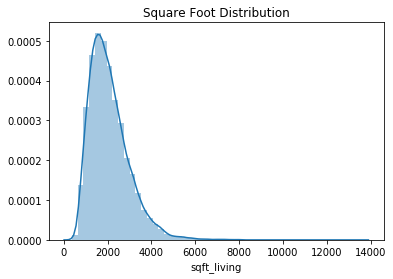

In [124]:
sns.distplot(data['sqft_living']).set_title('Square Footage Distribution')
data['sqft_living'].value_counts()

In [ ]:
remarks.loc[5] = ('sqft_living', 'some of proterty too big', 'remove bathrooms>=6')

Most of homes have a footage not more 5,000 square fits
****
### About column ***sqft_lot*** 

In [121]:
# check deneral statistic information
print('Square footage of the home Min:', data['sqft_lot'].min())
print('Square footage of the home Mean:', data['sqft_lot'].mean())
print('Square footage of the home Median:', data['sqft_lot'].median())
print('Square footage of the home Max:', data['sqft_lot'].max())

Square footage of the home Min: 520
Square footage of the home Mean: 15099.408760475992
Square footage of the home Median: 7618.0
Square footage of the home Max: 1651359


5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

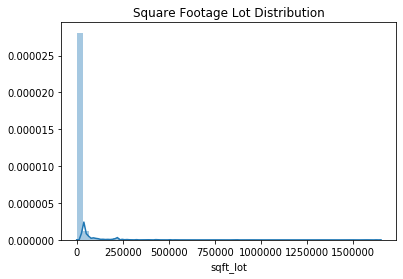

In [185]:
sns.distplot(data['sqft_lot']).set_title('Square Footage Lot Distribution')
data['sqft_lot'].value_counts()

Is some one try to sale small city? It's really odd max value!!!
****
### About column *floors*

In [135]:
data['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

Normal situation for CA suburb.
*****
### About column *waterfront*

In [136]:
data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

0 == house doesn't have a view to a waterfront \
1 == house has a view to a waterfront \
Oops! We have a missing values in this column!

In [138]:
fig = px.scatter_mapbox(data.loc[data['waterfront']==1], lat="lat", lon="long", color="price", hover_name="price", hover_data=["bedrooms", "bathrooms"],
                        color_discrete_sequence=["green"], size_max=15, zoom=8, width=900, height=600, 
                        title =  '<b>Map of houses with waterfront view</b>')
fig.update_layout(mapbox_style="open-street-map")
fig.show(config={'scrollZoom': False})

There are only 146 houses, which have a waterfront view.
****
### About column *view*

In [139]:
data['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [141]:
(len(data[data['view']>0]))/len(data)*100

9.779135991109875

We don't have a lot of information about which houses have been viewed. Only 10% of houses have been viewed.
****
### About column ***condition*** 
Relative to age and grade. Coded 1-5.\
**1** - ***Poor*** - Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.\
**2** - ***Fair*** - Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.\
**3** - ***Average*** - Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.\
**4** - ***Good*** - No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.\
**5** - ***Very Good*** - All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.\

In [142]:
data['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [151]:
print('Houses in very poor condition:  ', (len(data[data['condition']==1]))/len(data)*100)
print('Houses in fair condition:  ', (len(data[data['condition']==2]))/len(data)*100)
print('Houses in very good condition:  ', (len(data[data['condition']==5]))/len(data)*100)

Houses in very poor condition:   0.13427790896883826
Houses in fair condition:   0.7871463629207761
Houses in very good condition:   7.876093901930823


No more than **1 percent** of homes put up for sale in poor condition.
*****
### About column ***grade***
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:\
**1-3** -   Falls short of minimum building standards. Normally cabin or inferior structure. \
**4** -   Generally older, low quality construction. Does not meet code. \
**5** -   Low construction costs and workmanship. Small, simple design. \
**6** -   Lowest grade currently meeting building code. Low quality materials and simple designs. \
**7** -   Average grade of construction and design. Commonly seen in plats and older sub-divisions. \
**8** -   Just above average in construction and design. Usually better materials in both the exterior and interior finish work. \
**9** -   Better architectural design with extra interior and exterior design and quality. \
**10** -   Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage. \
**11** -   Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options. \
**12** -   Custom design and excellent builders. All materials are of the highest quality and all conveniences are present. \
**13** -   Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc. \

In [57]:
data['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

How we can see only **one** house has falls short of minimum building standards. We should closer look to this columns, because now growing demand for green homes.
****
### About column *sqft_above*

In [154]:
# check deneral statistic information
print('Square footage of house apart from basement Min:', data['sqft_above'].min())
print('Square footage of house apart from basement Mean:', data['sqft_above'].mean())
print('Square footage of house apart from basement Median:', data['sqft_above'].median())
print('Square footage of house apart from basement Max:', data['sqft_above'].max())

Square footage of house apart from basement Min: 370
Square footage of house apart from basement Mean: 1788.5968421540028
Square footage of house apart from basement Median: 1560.0
Square footage of house apart from basement Max: 9410


1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

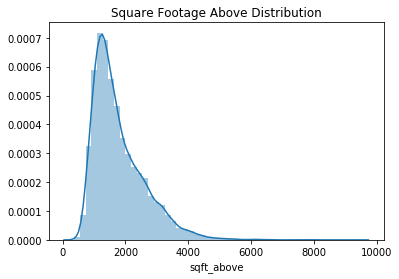

In [186]:
sns.distplot(data['sqft_above']).set_title('Square Footage Above Distribution')
data['sqft_above'].value_counts()

This columns repeat problems from column sqtf_lot.
****
### About column *sqft_basement*

In [158]:
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1245.0        1
2360.0        1
1816.0        1
176.0         1
374.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [159]:
data.loc[data['sqft_basement']=='?']

id       date      price  bedrooms  bathrooms  sqft_living  \
6      1321400060 2014-06-27   257500.0         3       2.25         1715   
18       16000397 2014-12-05   189000.0         2       1.00         1200   
42     7203220400 2014-07-07   861990.0         5       2.75         3595   
79     1531000030 2015-03-23   720000.0         4       2.50         3450   
112    2525310310 2014-09-16   272500.0         3       1.75         1540   
...           ...        ...        ...       ...        ...          ...   
21442  3226049565 2014-07-11   504600.0         5       3.00         2360   
21447  1760650900 2014-07-21   337500.0         4       2.50         2330   
21473  6021503707 2015-01-20   352500.0         2       2.50          980   
21519  2909310100 2014-10-15   332000.0         4       2.50         2380   
21581   191100405 2015-04-21  1580000.0         4       3.25         3410   

       sqft_lot  floors  waterfront  view  condition  ...  zipcode      lat  \
6          6819     2.0         0.0   0.0          3  ...    98003  47.3097   
18         9850     1.0         0.0   0.0          4  ...    98002  47.3089   
42         5639     2.0         0.0   0.0          3  ...    98053  47.6848   
79        39683     2.0         0.0   0.0          3  ...    98010  47.3420   
112       12600     1.0         0.0   0.0          4  ...    98038  47.3624   
...         ...     ...         ...   ...        ...  ...      ...      ...   
21442      5000     1.0         0.0   0.0          3  ...    98103  47.6931   
21447      4907     2.0         0.0   0.0          3  ...    98042  47.3590   
21473      1010     3.0         NaN   0.0          3  ...    98117  47.6844   
21519      5737     2.0         0.0   0.0          3  ...    98023  47.2815   
21581     10125     2.0         0.0   0.0          3  ...    98040  47.5653   

          long  sqft_living15  sqft_lot15  price_levels  year  month  day  \
6     -122.327           2238        6819         First  2014      6    4   
18    -122.210           1060        5095         First  2014     12    4   
42    -122.016           3625        5639        Fourth  2014      7    0   
79    -122.025           3350       39750        Fourth  2015      3    0   
112   -122.031           1540       11656         First  2014      9    1   
...        ...            ...         ...           ...   ...    ...  ...   
21442 -122.330           2180        5009         Third  2014      7    4   
21447 -122.081           2300        3836        Second  2014      7    0   
21473 -122.387            980        1023        Second  2015      1    1   
21519 -122.356           2380        5396        Second  2014     10    2   
21581 -122.223           2290       10125        Fourth  2015      4    1   

       sqft_living_levels sqft_lot_levels  
6                  Second          Second  
18                  First           Third  
42                 Fourth          Second  
79                 Fourth          Fourth  
112                Second          Fourth  
...                   ...             ...  
21442               Third           First  
21447               Third           First  
21473               First           First  
21519               Third          Second  
21581              Fourth           Third  

[454 rows x 27 columns]

Based on information about dataframe columns and this query - we should change this column, and replace value `?`.
****
### About column *yr_built*

In [160]:
data['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [162]:
print('Min built year:', data['yr_built'].min())
print('Max built year:', data['yr_built'].max())

Min built year: 1900
Max built year: 2015


Text(0.5, 1.0, 'Build Year Distribution')

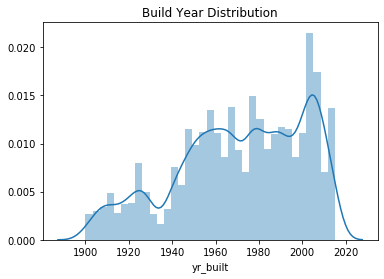

In [165]:
sns.distplot(data['yr_built']).set_title('Build Year Distribution')

We have a historical buildings!!!!
****
### About column *yr_renovated*

In [169]:
data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [170]:
(data[data['yr_renovated']>0])

id       date      price  bedrooms  bathrooms  sqft_living  \
1      6414100192 2014-12-09   538000.0         3       2.25         2570   
35     9547205180 2014-06-13   696000.0         3       2.50         2300   
95     1483300570 2014-09-08   905000.0         4       2.50         3300   
103    2450000295 2014-10-07  1090000.0         3       2.50         2920   
125    4389200955 2015-03-02  1450000.0         4       2.75         2750   
...           ...        ...        ...       ...        ...          ...   
19602  6392000625 2014-07-12   451000.0         2       1.00          900   
20041   126039256 2014-09-04   434900.0         3       2.00         1520   
20428  4305600360 2015-02-25   500012.0         4       2.50         2400   
20431  3319500628 2015-02-12   356999.0         3       1.50         1010   
20946  1278000210 2015-03-11   110000.0         2       1.00          828   

       sqft_lot  floors  waterfront  view  condition  ...  zipcode      lat  \
1          7242     2.0         0.0   0.0          3  ...    98125  47.7210   
35         3060     1.5         0.0   0.0          3  ...    98115  47.6827   
95        10250     1.0         0.0   0.0          3  ...    98040  47.5873   
103        8113     2.0         0.0   0.0          3  ...    98004  47.5814   
125       17789     1.5         0.0   0.0          3  ...    98004  47.6141   
...         ...     ...         ...   ...        ...  ...      ...      ...   
19602      6000     1.0         0.0   0.0          3  ...    98115  47.6855   
20041      5040     2.0         0.0   0.0          3  ...    98177  47.7770   
20428      9612     1.0         0.0   0.0          3  ...    98059  47.4799   
20431      1546     2.0         NaN   0.0          3  ...    98144  47.5998   
20946      4524     1.0         0.0   0.0          3  ...    98001  47.2655   

          long  sqft_living15  sqft_lot15  price_levels  year  month  day  \
1     -122.319           1690        7639         Third  2014     12    1   
35    -122.310           1590        3264        Fourth  2014      6    4   
95    -122.249           1950        6045        Fourth  2014      9    0   
103   -122.196           2370        8113        Fourth  2014     10    1   
125   -122.212           3060       11275        Fourth  2015      3    0   
...        ...            ...         ...           ...   ...    ...  ...   
19602 -122.289           1460        4800         Third  2014      7    5   
20041 -122.362           1860        8710        Second  2014      9    3   
20428 -122.127           2430        5539         Third  2015      2    2   
20431 -122.311           1010        1517        Second  2015      2    3   
20946 -122.244            828        5402         First  2015      3    2   

       sqft_living_levels sqft_lot_levels  
1                  Fourth          Second  
35                  Third           First  
95                 Fourth           Third  
103                Fourth           Third  
125                Fourth          Fourth  
...                   ...             ...  
19602               First          Second  
20041              Second           First  
20428               Third           Third  
20431               First           First  
20946               First           First  

[744 rows x 27 columns]

In [171]:
print('Renovated:  ', (len(data[data['yr_renovated']>0]))/len(data)*100)

Renovated:   3.4449229059591606


We have information only about 3,5% houses with renovation.

****
### About column *zipcode*

In [172]:
data['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Text(0.5, 1.0, 'Zipcode Distribution')

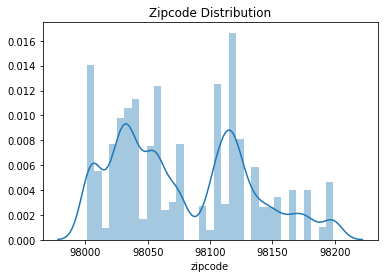

In [173]:
sns.distplot(data['zipcode']).set_title('Zipcode Distribution')

If we know zipCode, we can check information about neighborhood.
*****
### About column *lat* and *long* 
Based on these data, I built a plot of locality at the beginning of my research.

In [183]:
# check deneral statistic information
print('Latitude cootdinate')
print('Min:', data['lat'].min())
print('Mean:', data['lat'].mean())
print('Median:', data['lat'].median())
print('Max:', data['lat'].max())
print('------')
print('Longitude cootdinate')
print('Min:', data['long'].min())
print('Mean:', data['long'].mean())
print('Median:', data['long'].median())
print('Max:', data['long'].max())

Latitude cootdinate
Min: 47.1559
Mean: 47.56009299439733
Median: 47.5718
Max: 47.7776
------
Longitude cootdinate
Min: -122.51899999999999
Mean: -122.21398249756845
Median: -122.23100000000001
Max: -121.315


****
### About column *sqft_living15*

In [175]:
# check deneral statistic information
print('The square footage of interior housing living space for the nearest 15 neighbors')
print('Min:', data['sqft_living15'].min())
print('Mean:', data['sqft_living15'].mean())
print('Median:', data['sqft_living15'].median())
print('Max:', data['sqft_living15'].max())

The square footage of interior housing living space for the nearest 15 neighbors
Min: 399
Mean: 1986.6203176367087
Median: 1840.0
Max: 6210


Text(0.5, 1.0, 'Nearest 15 neighbors  Distribution')

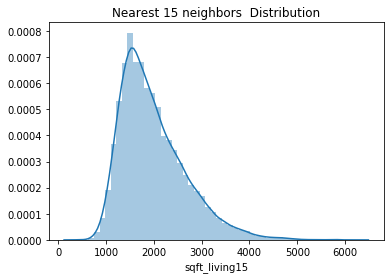

In [178]:
sns.distplot(data['sqft_living15']).set_title('Nearest 15 neighbors  Distribution')

****
### About column *sqft_lot15*

In [176]:
# check deneral statistic information
print('The square footage of the land lots of the nearest 15 neighbors')
print('Min:', data['sqft_lot15'].min())
print('Mean:', data['sqft_lot15'].mean())
print('Median:', data['sqft_lot15'].median())
print('Max:', data['sqft_lot15'].max())

The square footage of the land lots of the nearest 15 neighbors
Min: 651
Mean: 12758.283511598833
Median: 7620.0
Max: 871200


Text(0.5, 1.0, 'Nearest 15 neighbors  Distribution')

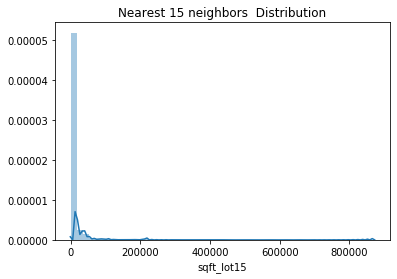

In [179]:
sns.distplot(data['sqft_lot15']).set_title('Nearest 15 neighbors  Distribution')

Some one has around **13 football field** in their property. \
Let's check correlation between features on this step.

In [222]:
data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
year             0.003727
day             -0.001747
month           -0.009928
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

Looking at the correlation between price and the other features, one can notice that the strongest correlation is between price and **sqft_living (0.7)**, **grade (0.67)**, and **sqft_above (0.61)**. Not surprisingly, there is virtually no correlation between price and zipcode, id, and longitude. But we should check it after cleaning.

****

## Summary
### What do we have after all this steps?

* Dataset has 21,597 records in 21 columns.
* The variable we are going to predict is the price. Price is the dependent or target variable. I think we should take a closer look to features: 
    - Year when house was renovated and Built Year -- Do we pay more for older or for modern houses? 
    - Grade and condition -- What features are most important in predicting the price of a house? 
    - Square footage -- I'm not sure which of size affect more.
* Some of features have a outliers, we need a close look on them
-------
For next scrubbing step:
1. check column `'date'`, `'sqft_basement'`
2. check duplicates `'id`
2. check missing values for `'waterfront'`,`'view'`,`'yr_renovated'`
4. check values max, min, average and peak values
5. based on map (`'lat'`,`'long'`), check outlyning objects
6. we have candidates for removal: `'day'`,`'month'`,`'id'`,`'zipcode'`

In [199]:
remarks

column_name                                    problem  \
0          id                                 duplicates   
1        date                   type of column is object   
2       price                big gap between min and max   
3   bathrooms  0.02% of homes have more than 6 bathrooms   

                                            solution  
0            check one more times, whta is that mean  
1  change data type to datatime for convenience o...  
2                       remove super expensive homes  
3                                remove bathrooms>=6